In [8]:
# Importando bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Modules.Helper import Helper
from Modules.Solvers import Solvers
from Modules.Plotters import Plotters
from Modules.Equation import Equation

In [10]:
ind_atual = [ 1.7295845806305183, 2.137872287393499, 0.8115630215517095, 0.10929121464989712, 1.2304053798528052, 1.7835884292159854, 1.1403239306934438, 1.043105485209666, 3.470329119244101, 3.2051652257615313, 0.4520916163461513, 0.5569045731322917, 0.998501872972112, 0.7764522466015744, 0.714044959002351, 0.6614355144532335, 0.419715052899603, 0.4802077471812636, 0.6590226292521215, 0.9992832033566835, 0.8475066983404798, 0.6149072199046399, 0.5546829989124753, 0.45619763535135, 0.17160901721122174, 20.31025928317277, 9.993535167046062, 24.812027109545195, 12.380493877679761, 2.034178595889051, 2.035733440415823, 6.524727690407622, 4.184658746008267, 7.218593487138588, 24.628047437928384, 2.2001040611019183, 7.511741677486343, 21.739608192413545, 20.413495907981233, 3.5353856382635227, 2.2810456094511795, 7.551791888564684, 1.318711233661558, 3.8481834040699017, 0.4790390756128461, 2.750189500079153, 1.5747324187845937, 3.976944214359518, 4.93437509566884, 7.581591017750097, 5.6689413033497615, 2.7723613211220806, 1.216541601270928, 0.7128563891690599, 1.562429197851857, 4.725479425719405, 1.0254430398309093, 1.6301823327158054, 3.704157616574442, 1.7149767325600582, 1.7639762564896415, 2.589737516439637, 0.9643323063462832, 2.5168025612195613, 7.048318160466932, 1.0536450866019669, 5.315804391363255, 2.4740860987818403, 0.3721931811917861, 0.8447572048127299, 1.1434851937321493, 0.957646192168535, 0.9844917211052004, 3.839638812272926, 3.774733074267533, 3.598973618945015, 1.1689344148649397, 0.8120452851483856, 1.2939472410757618, 3.489103624812642]


tauA = ind_atual[0]
tauB = ind_atual[1]
tauC = ind_atual[2]
tauD = ind_atual[3]
tauE = ind_atual[4]
tauF = ind_atual[5]
tauG = ind_atual[6]
tauH = ind_atual[7]
tauI = ind_atual[8]
tauJ = ind_atual[9]
kAJ = ind_atual[10]
kBE = ind_atual[11]
kCB = ind_atual[12]
kCF = ind_atual[13]
kCA = ind_atual[14]
kDF = ind_atual[15]
kEJ = ind_atual[16]
kFA = ind_atual[17]
kGB = ind_atual[18]
kGF = ind_atual[19]
kGA = ind_atual[20]
kHF = ind_atual[21]
kIG = ind_atual[22]
kIH = ind_atual[23]
kJI = ind_atual[24]
nAJ = ind_atual[25]
nBE = ind_atual[26]
nCB = ind_atual[27]
nCF = ind_atual[28]
nCA = ind_atual[29]
nDF = ind_atual[30]
nEJ = ind_atual[31]
nFA = ind_atual[32]
nGB = ind_atual[33]
nGF = ind_atual[34]
nGA = ind_atual[35]
nHF = ind_atual[36]
nIG = ind_atual[37]
nIH = ind_atual[38]
nJI = ind_atual[39]

In [11]:
# Dicionário de Coeficientes
coefficients = {
    'A': {
        'J': {
            'n': nAJ,
            'k': kAJ,
            '-': True,
        },
        'tau': tauA
    },
    'B': {
        'E': {
            'n': nBE,
            'k': kBE,
            '-': False
        },
        'tau': tauB
    },
    'C': {
        'A': {
            'n': nCA,
            'k': kCA,
        },
        'B': {
            'n': nCB,
            'k': kCB,
        },
        'F': {
            'n': nCF,
            'k': kCF,
        },
        'tau': tauC
    },
    'D': {
        'F': {
            'n': nDF,
            'k': kDF,
            '-': False,
        },
        'tau': tauD
    },
    'E': {
        'J': {
            'n': nEJ,
            'k': kEJ,
            '-': True,
        },
        'tau': tauE
    },
    'F': {
        'A': {
            'n': nFA,
            'k': kFA,
            '-': False,
        },
        'tau': tauF
    },
    'G': {
        'A': {
            'n': nGA,
            'k': kGA,
        },
        'B': {
            'n': nGB,
            'k': kGB,
        },
        'F': {
            'n': nGF,
            'k': kGF,
        },
        'tau': tauG
    },
    'H': {
        'F': {
            'n': nHF,
            'k': kHF,
            '-': False,
        },
        'tau': tauH
    },
    'I': {
        'G': {
            'n': nIG,
            'k': kIG,
            '-': False,
        },
        'H': {
            'n': nIH,
            'k': kIH,
            '-': False,
        },
        'tau': tauI
    },
    'J': {
        'I': {
            'n': nJI,
            'k': kJI,
            '-': False,
        },
        'tau': tauJ
    }
}

In [18]:
labels = ['A', 'B', "C", 'D', 'E', 'F', 'G', 'H', 'I', 'J']
methods =  ['Euler', 'RK6', 'RK45', 'RK23', 'DOP853', 'LSODA', 'BDF']
equation = Equation(coefficients=coefficients, labels=labels)

df, max_data = Helper.load_data(filename='Data/GRN10_DATA_ERRADO.txt', labels=labels)
# df, max_data = Helper.load_data(filename='Data/GRN10_DATA.txt', labels=labels)

# Condições iniciais
initial_conditions = [df[label].iloc[0] for label in labels]

# Intervalo de tempo
t_span = (0, 72)
h = 0.01
t_eval = np.linspace(*t_span, int((t_span[1]-t_span[0])/h))

In [19]:
# Sistema de EDOs

def system(t, y):
    vals = [Solvers.norm_hardcoded(val, max_data[label]) for val, label in zip(y, labels)]
    N_A, N_B, N_C, N_D, N_E, N_F, N_G, N_H, N_I, N_J = vals
    
    dA = equation.full_eq(vals, 'A', 'J')

    dB = equation.full_eq(vals, 'B', 'E')
    
    dC = equation.complex_eqs(vals, 'C', [
             ['+B', '-F', '-A'], 
             ['-B', '+F', '-A'],
             ['-B', '-F', '+A'],
             ['+B', '-F', '+A'],
             ['-B', '+F', '+A'],
             ['+B', '+F', '+A'],
    ])

    # dD = ((N_F**nDF)/((N_E**nDF)+(kDF**nDF))-(N_D)) / tauD
    # dD = ((N_F**nDF)/((N_F**nDF)+(kDF**nDF))-(N_D)) / tauD
    dD = equation.full_eq(vals, 'D', 'F')

    dE = equation.full_eq(vals, 'E', 'J')

    dF = equation.full_eq(vals, 'F', 'A')
    
    dG = equation.complex_eqs(vals, 'G', [
             ['+B', '-F', '-A'],
             ['-B', '+F', '-A'],
             ['-B', '-F', '+A'],
             ['+B', '-F', '+A'],
             ['-B', '+F', '+A'],
             ['+B', '+F', '+A'] 
    ])

    dH = equation.full_eq(vals, 'H', 'F')

    dI = equation.complex_eqs(vals, 'I', [['+G', '+H']])

    dJ = equation.full_eq(vals, 'J', 'I')

    return [dA, dB, dC, dD, dE, dF, dG, dH, dI, dJ]

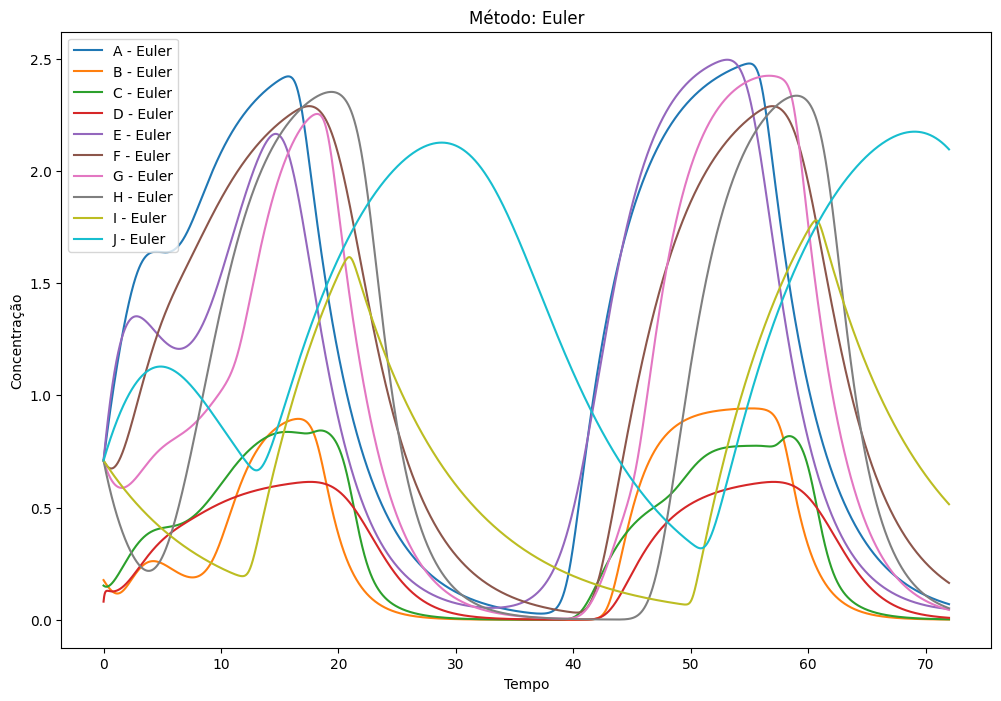

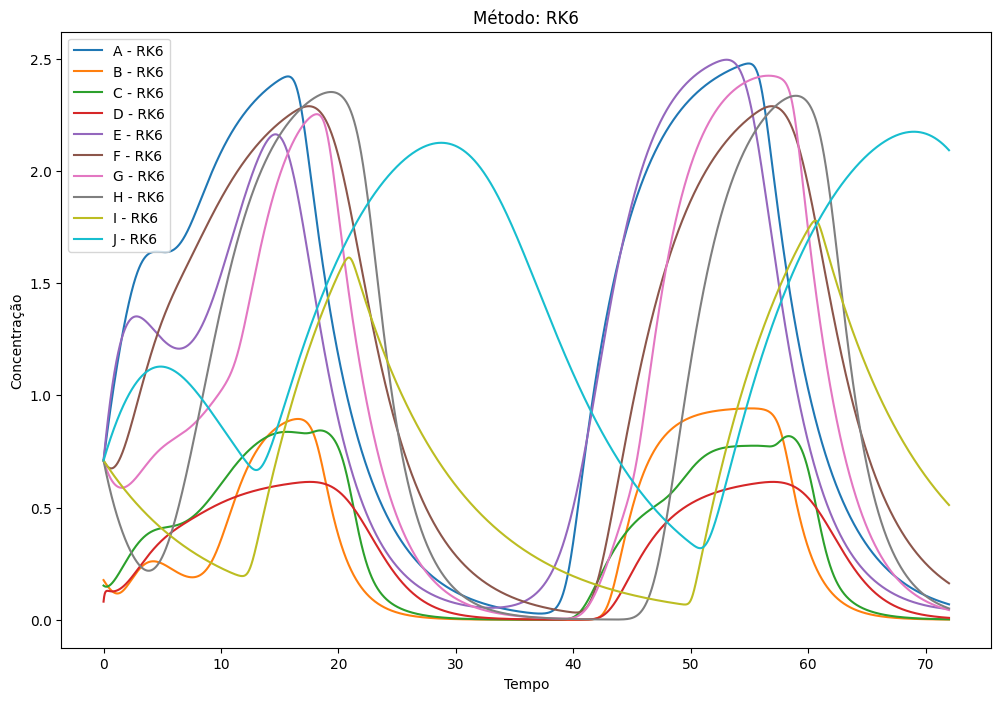

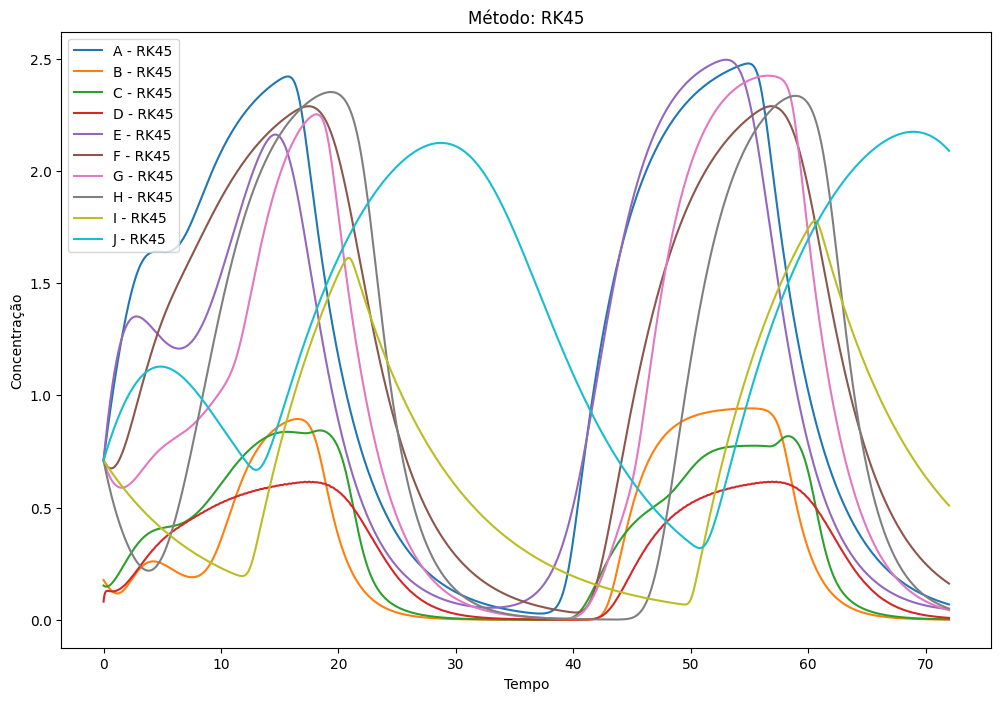

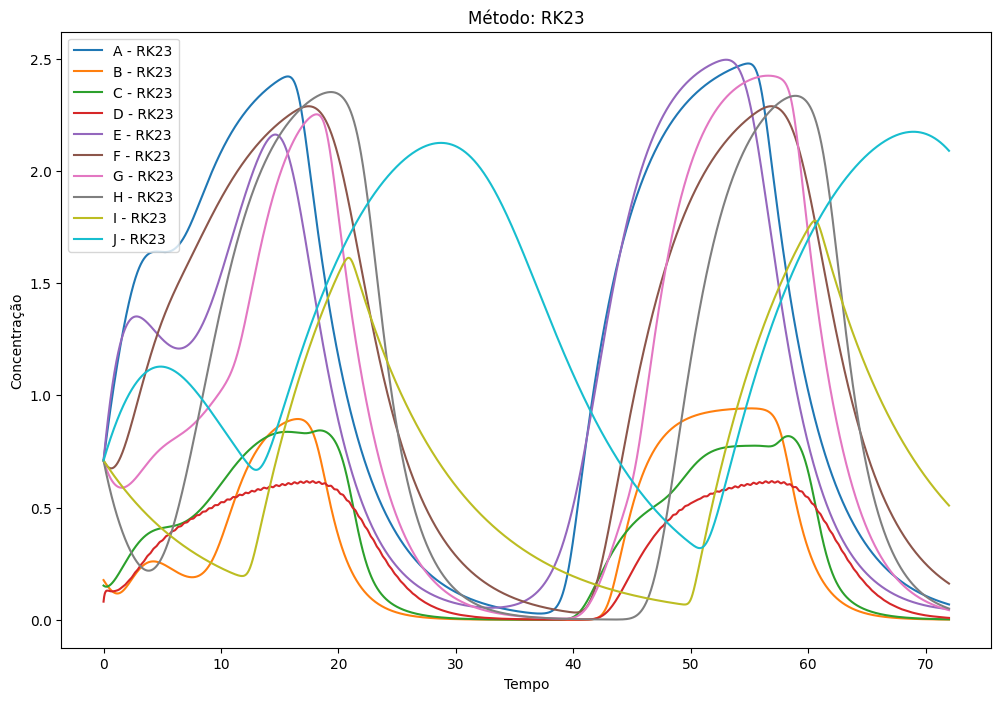

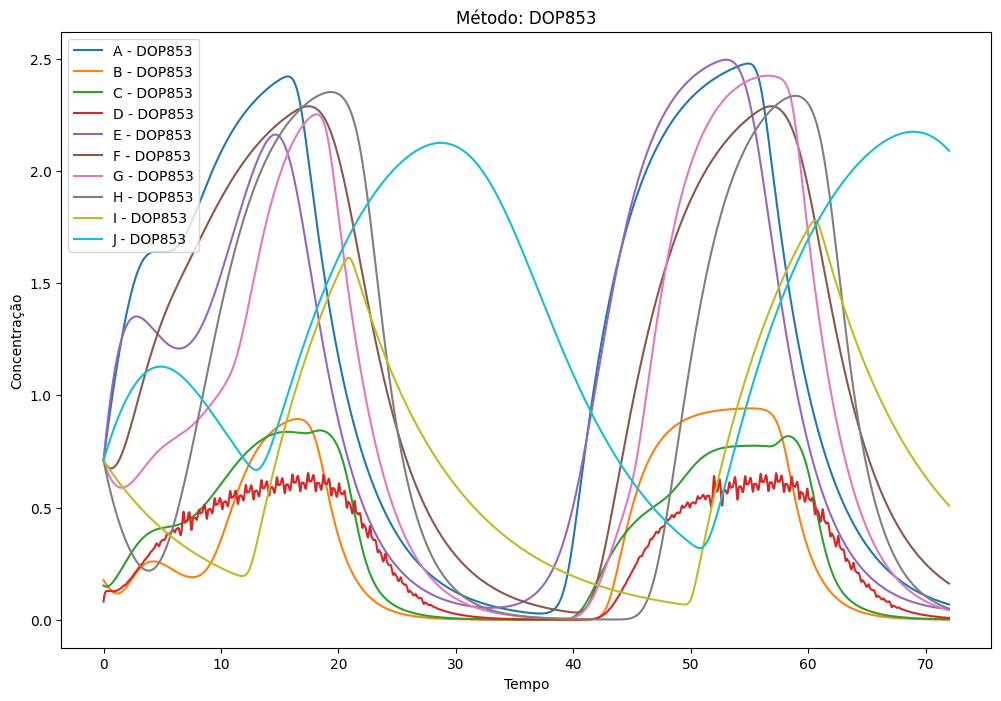

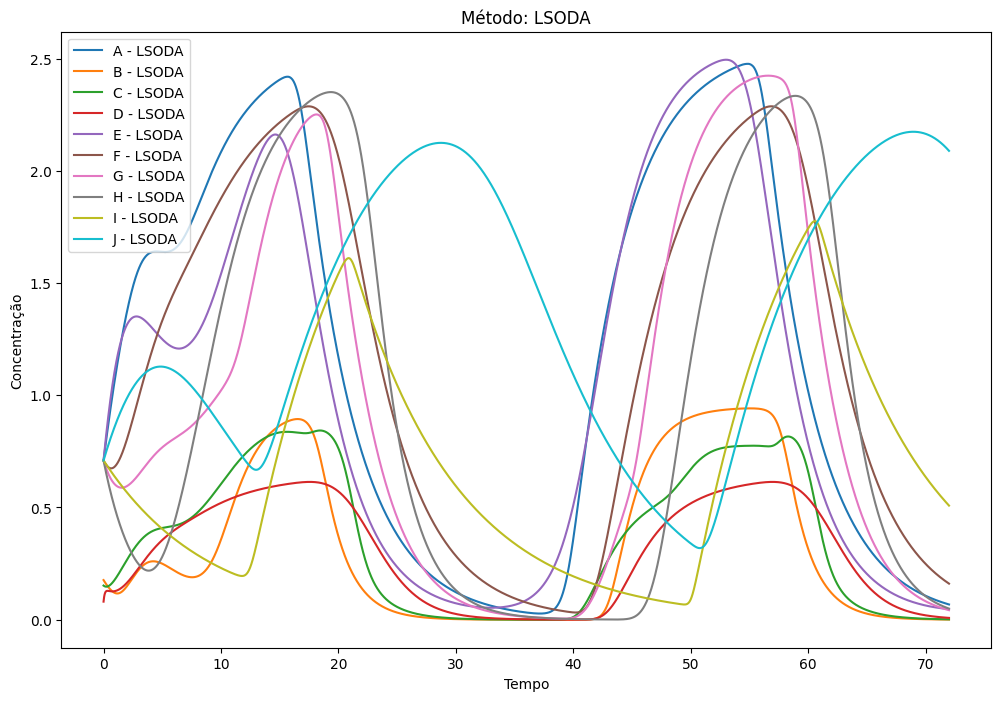

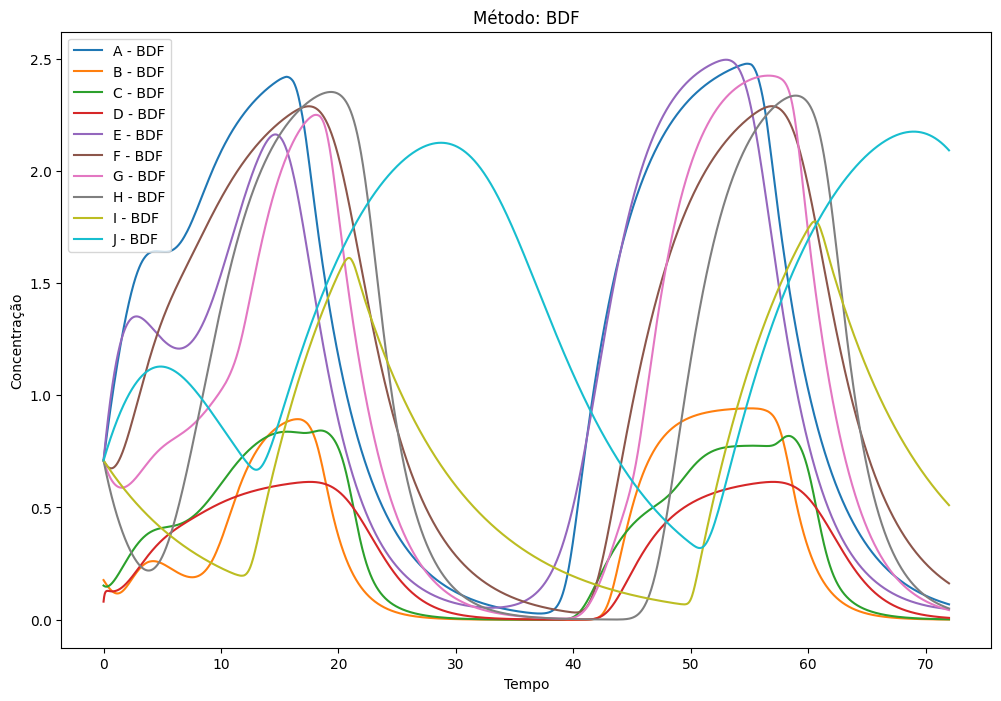

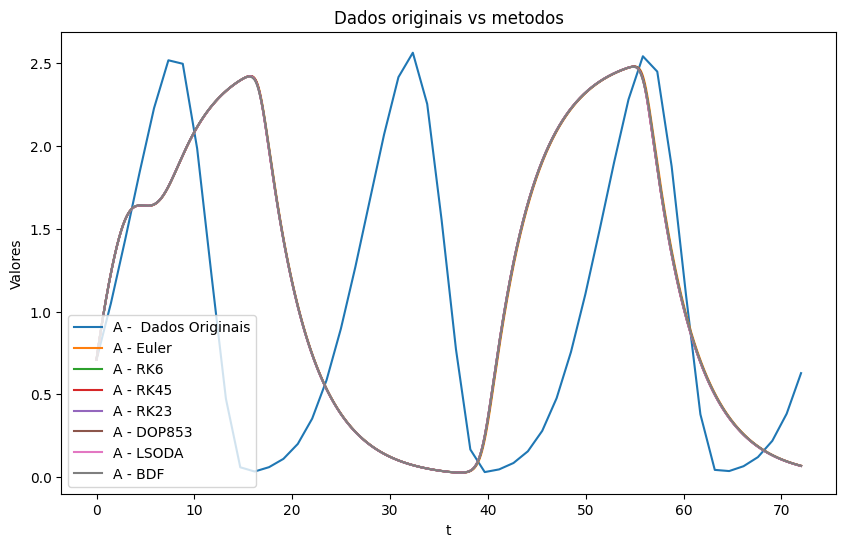

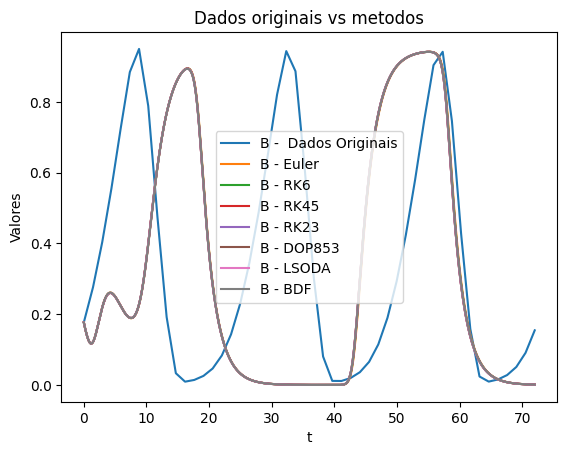

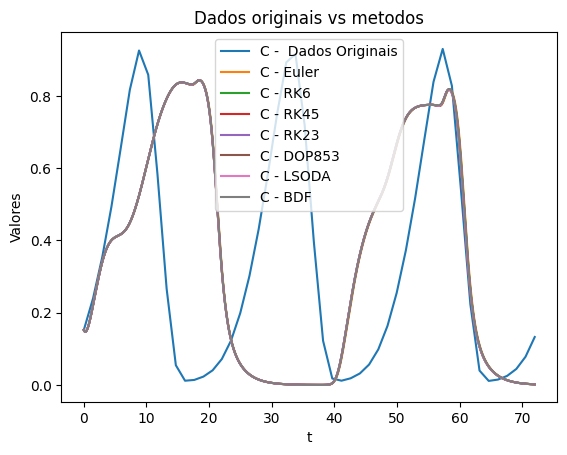

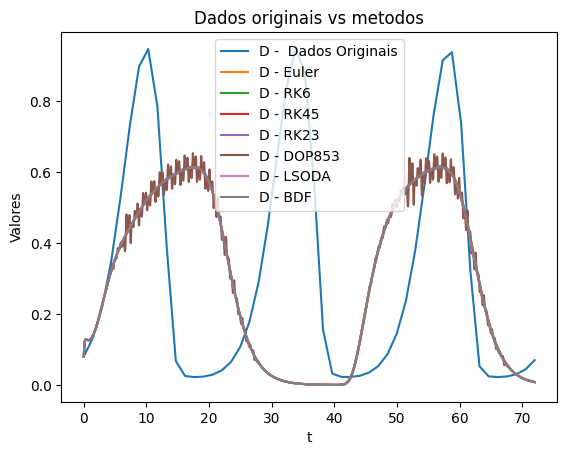

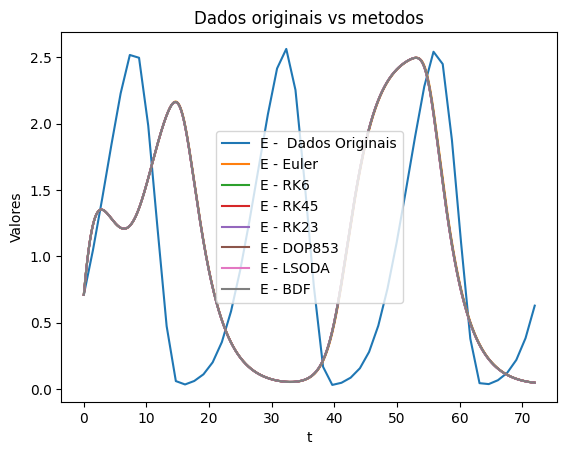

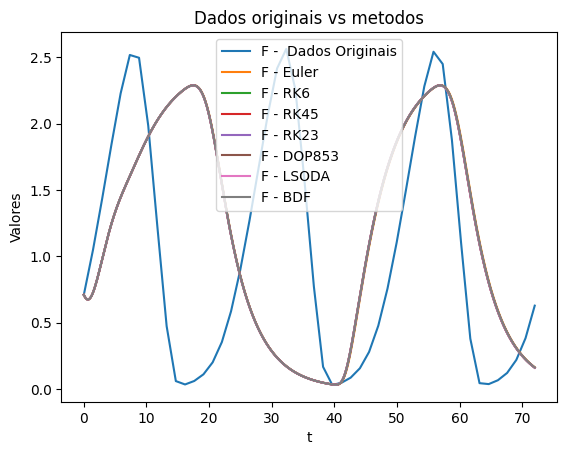

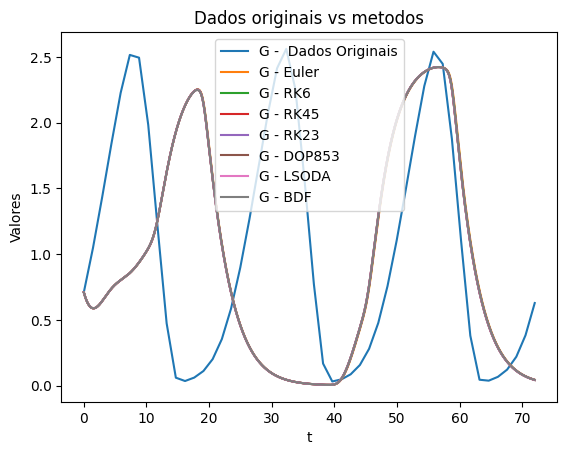

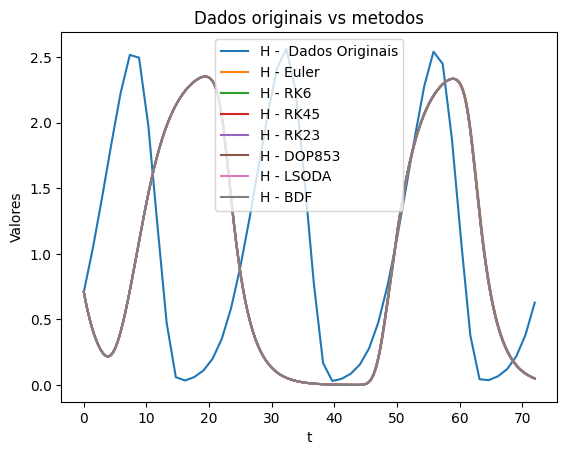

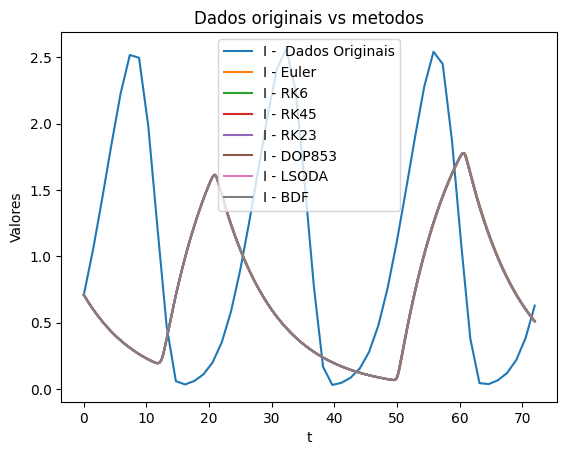

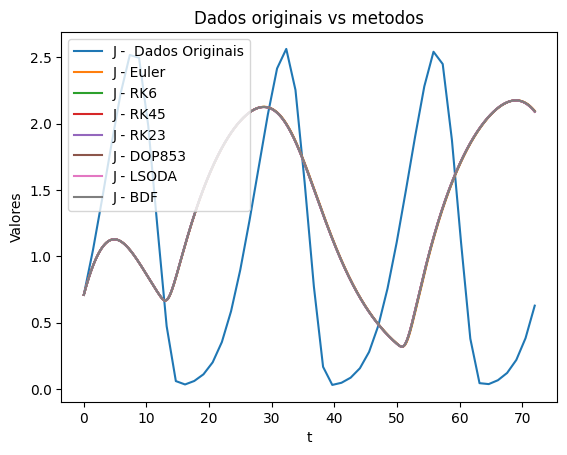

In [20]:
# Resolução dos métodos
results = {}

for method in methods:
    if method != 'Euler' and method != 'RK6':
        results[method] = solve_ivp(system, t_span, initial_conditions, method=method, t_eval=t_eval).y
    else:
        results[method] = Solvers.solve_manual(fun=system, y0=initial_conditions,method=method, t_eval=t_eval, h=h)

Plotters.plot_methods(results=results,t=t_eval, methods=methods, labels=labels)   
Plotters.plot_comparison(results=results,t=t_eval, df=df, methods=methods, labels=labels)   